In [41]:


import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA  
from sklearn.preprocessing import StandardScaler   
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from scipy.signal import savgol_filter  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix


dir = 'C:\\tes\\Kuliah\\ReferensiSkripsi\\Source Code\\LDA\\Source Code Utama\\Data_serapan_baru.csv'
data_serapan = pd.read_csv(dir)    
grup_data = data_serapan.values[:,2].astype('uint8')  
nilai_serapan = data_serapan.values[:,3:]
kelas=['Cengkir', 'Kweni', 'Kent','Palmer']

#Filtering Menggunakan Savitzky-Golay
derivasi_ns = savgol_filter(nilai_serapan, 5, 2)
derivasi_ns_scaled = StandardScaler().fit_transform(nilai_serapan) 



In [42]:
#Inisiasi Model
kf = StratifiedKFold(n_splits=5)
models = KNeighborsClassifier(n_neighbors=5)

acc_score = []
acc_std_score = []
predicted_targets = []
actual_targets = []


In [43]:
#Iterasi untuk validasi silang

for train_index , test_index in kf.split(derivasi_ns_scaled, grup_data):
    X_train , X_test = derivasi_ns_scaled[train_index,:],derivasi_ns_scaled[test_index,:]
    y_train , y_test = grup_data[train_index] , grup_data[test_index]
    
    #Reduksi dimensi menggunakan LDA
    lda = LDA(n_components=2)
    lda_fitted = lda.fit_transform(X_train, y_train)
    lda_test = lda.transform(X_test)
    lda_fitted_scaled = StandardScaler().fit_transform(lda_fitted)
    lda_test_scaled = StandardScaler().fit_transform(lda_test)

    models.fit(lda_fitted_scaled,y_train)
    pred_values = models.predict(lda_test_scaled)
    
    predicted_targets = np.append(predicted_targets, pred_values)
    actual_targets = np.append(actual_targets, y_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
    
#Rerata     
avg_acc_score = sum(acc_score)/5
#Standar Deviasi
avg_std_score = np.std(acc_score)


print('Rerata Akurasi : {}'.format(avg_acc_score))
print('Standar Deviasi : {}'.format(avg_std_score))

Rerata Akurasi : 0.9785206258890469
Standar Deviasi : 0.010743219111521578


In [44]:
def generasi_confusion_matrix(matriks, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        matriks = matriks.astype('float') / matriks.sum(axis=1)[:, np.newaxis]

    plt.imshow(matriks, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matriks.max() / 2.

    for i, j in itertools.product(range(matriks.shape[0]), range(matriks.shape[1])):
        plt.text(j, i, format(matriks[i, j], fmt), horizontalalignment="center",
                 color="white" if matriks[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return matriks

#Berfungsi untuk menampilkan data confusion matrix

def plot_matriks(predicted_labels_list, y_test_list):
    matriks = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    plt.figure()
    generasi_confusion_matrix(matriks, classes=kelas, normalize=True, title='Confusion matrix of LDA Reduction KNN')
    plt.show()

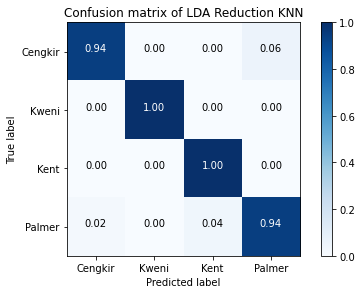

In [45]:
plot_matriks(predicted_targets, actual_targets)